# ¿Qué factores son críticos para las solicitudes de hipotecas?

In [15]:
### Librerias
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import os

%matplotlib inline
plt.style.use('ggplot')

In [16]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd '/content/gdrive/MyDrive/Curso Data Science para todos/Datos/'

/content/gdrive/MyDrive/Curso Data Science para todos/Datos


## Introduccion

**Contexto comercial.** Una hipoteca es un préstamo para comprar una casa. Si un comprador potencial será aprobado o no para una hipoteca, y cuánto dinero se aprobará, puede brindar información sobre la salud del mercado inmobiliario. Los requisitos para la aprobación de la solicitud de hipoteca cambian con el tiempo.

**Problema comercial.** Usted es investigador en una empresa de bienes raíces y recibió el siguiente correo electrónico de su jefe esta mañana:

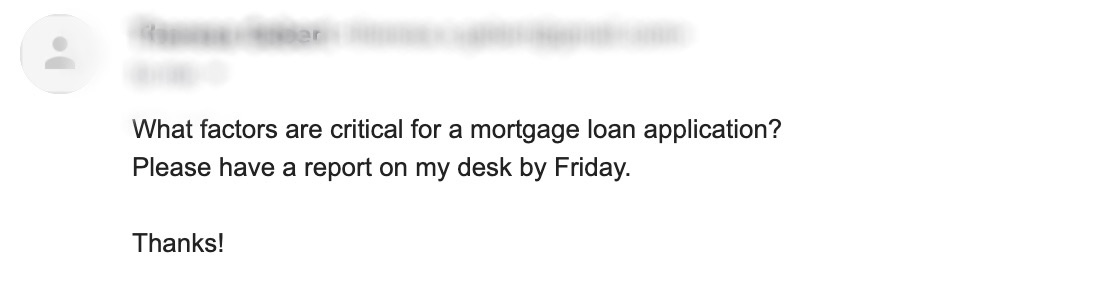

**Contexto Analítico.** *¿Qué información tengo? ¿Qué información necesito? ¿Tengo suficiente información?* Estas son preguntas cruciales que todos los científicos de datos deben hacerse antes de comenzar cualquier análisis. En este caso, mejoraremos sus habilidades para recopilar información y evaluar la suficiencia de la información. También practicará las habilidades que aprendió previamente en la interpretación de gráficos y figuras y la comprensión de resúmenes de datos básicos. El conjunto de datos que utilizaremos son los datos de rendimiento de préstamos unifamiliares de Fannie Mae.

El caso está estructurado de la siguiente manera: (1) primero comprenderan y aclararan la pregunta de interés; (2) obtener una idea de su conjunto de datos ideal, que es un paso crucial antes de recopilar información; (3) aprender a leer a través de una descripción de datos; (4) determinar las limitaciones de su conjunto de datos y evaluar su suficiencia para responder la pregunta de interés; (5) explorar los datos de adquisición a través de gráficos y resúmenes de datos; y (6) sacar conclusiones preliminares basadas en cuadros y figuras descriptivos.


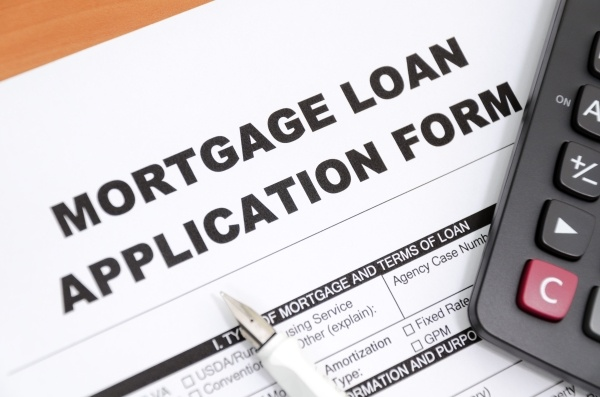



## Clarificando la pregunta de interes
En un mundo ideal, el usuario comercial siempre acudirá al científico de datos con una pregunta bien planteada y un conjunto de datos limpio. En realidad, esto rara vez es el caso. Sumergirse directamente en la búsqueda o el análisis de datos sin tener preguntas claras y específicas para responder es un error común. Esta es la razón por la cual el primer paso en la canalización del científico de datos es comprender y aclarar la pregunta de interés.

Recordemos la pregunta de interés:

> **¿Qué factores son críticos para una solicitud de préstamo hipotecario?**

Tenga en cuenta que esta pregunta no es lo suficientemente específica como para recopilar información. Por ejemplo, ¿a su jefe le importan los factores que contribuyen a que el préstamo *sea aprobado* o los factores que contribuyen al *desempeño del prestatario en el pago del préstamo*? ¿A su jefe le importan los préstamos en los EE. UU. o solo en un estado o región en particular?

### Pregunta:
Dedique de 2 a 3 minutos a hacer una lluvia de ideas sobre una lista de preguntas que le gustaría hacerle a su jefe.


Hay dos formas principales de aclarar una cuestión de interés. A veces es útil diseccionar casi cada palabra de la pregunta y exigir **especificidad**. Por ejemplo, ¿qué significa "crítico" para su jefe? A veces es útil exigir **medibilidad**. Por ejemplo, ¿cómo mide su jefe el resultado de una "solicitud de préstamo hipotecario"? En el siguiente ejercicio, exploraremos varias preguntas que podría hacerle a su jefe y si son buenas preguntas o no.


### Ejercicio 1:

#### 1.1
Una de las preguntas que le hace a su jefe es aclarar el *resultado* de interés. *¿Qué* parte del resultado de la solicitud de préstamo hipotecario le importa? ¿Cuáles de los siguientes son ejemplos de resultados de solicitud de préstamo hipotecario "buenos" (específicos y medibles)? Seleccione todas las que correspondan.

(a) Si el préstamo se aprueba o no;

(b) Si se aprueba o no el préstamo por el monto total solicitado inicialmente;

(c) el desempeño del deudor en el pago del préstamo;

(d) Ninguna de estas opciones son ejemplos de resultados "buenos" (específicos y medibles).


**Respuesta.** (a) y (b) son ejemplos de resultados que aclararían adecuadamente la pregunta de interés. Observe que (a) y (b) son las llamadas **variables binarias** (solo son posibles dos resultados: aprobación o no aprobación). (c) no es un buen ejemplo, porque el desempeño del deudor es un concepto complejo que no es lo suficientemente específico. ¿El "desempeño" es qué tan rápido el deudor paga el préstamo completo, la cantidad de pagos a tiempo que hace o algo completamente diferente?



#### 1.2
Otra pregunta que le hace a su jefe es aclarar la *población* de interés. *¿De quién* son las solicitudes de préstamos hipotecarios que le interesan? ¿Cuáles de los siguientes son ejemplos de preguntas aclaratorias para las solicitudes de préstamos hipotecarios de quién podría interesar a su jefe?

(a) ¿Solicitudes de hipotecas de todo EE. UU. o solo de un estado o región en particular?

(b) ¿Solicitudes de hipotecas para viviendas unifamiliares o también para viviendas plurifamiliares?

(c) ¿Solicitudes de hipotecas de madres solteras o de todos los hogares?

(d) Todos los anteriores son buenos ejemplos de preguntas aclaratorias.


**Respuesta.** (d) porque todas las preguntas son buenos ejemplos de preguntas aclaratorias. Al considerar la población de interés, es posible que desee hacer preguntas sobre la región, la información demográfica y otros factores específicos de las solicitudes de hipotecas (por ejemplo, viviendas unifamiliares o multifamiliares).


#### 1.3
Por último, una pregunta para hacerle a su jefe, necesita aclarar qué quieren decir con *factores*. Su jefe puede tener algo específico en mente cuando dice esto y una buena manera de asegurarse de que entiende lo que quiere decir es dar ejemplos de factores que está pensando incorporar en su análisis. Para cada una de las siguientes categorías de factores, proporcione un ejemplo de un factor específico que desee medir. El primero ha sido hecho por ti.

1. ¿Características demográficas del solicitante? e.g **género**
2. ¿Historial crediticio del solicitante?
3. ¿Tiempo de la aplicación?
4. ¿Características de la casa que se compra?
5. ¿Estructura de amortización de la hipoteca que se solicita?


**Respuesta.** Estos son ejemplos de respuestas: 2. puntuación crediticia, 3. mes o tiempo de aplicación, 4. código postal, 5. número de años

## Conocer el dataset ideal

Ahora, suponga que ha realizado el ejercicio anterior con su jefe y que han aclarado que quieren responder la pregunta:

> **¿Qué factores de las solicitudes de hipotecas unifamiliares en los EE. UU. están más relacionados con la devolución del préstamo a tiempo?**

Con nuestra pregunta en la mano, el siguiente paso lógico es *saber qué datos necesitamos para responder esa pregunta*; es decir, **recopilación de información**. A menudo, es útil imaginar su conjunto de datos ideal antes de buscar conjuntos de datos o sumergirse en el análisis de un conjunto de datos que se le ha proporcionado. Por ejemplo, si la pregunta de interés fuera simplemente "¿Cuál es la correlación entre el monto de la hipoteca (en USD) y el tiempo (en semanas) que lleva pagarla?" entonces nuestro conjunto de datos ideal debería tener AL MENOS las siguientes columnas:


```
___________________________________
cantidad_prestamo | semanas_para_pagar
```

En general, queremos datos que sean lo más granulares posible. Por ejemplo, si estamos interesados en las tendencias a lo largo del tiempo, en igualdad de condiciones, cuando comparemos los datos registrados a nivel diario con los de nivel mensual, preferiremos los datos a nivel diario. Si estamos interesados en las tendencias entre las personas, el conjunto de datos ideal tendrá muestras de una gran cantidad de personas diversas.

Sin embargo, hay dos advertencias importantes sobre "más es mejor":

1. Tener una muestra representativa es aún más importante que tener una muestra grande. (Obtendrá más información sobre cómo evaluar formalmente la representatividad en casos futuros).
2. La recopilación de más datos a menudo implica mucho más trabajo. A veces, puede ser necesario hacer concesiones por las que opta por un conjunto de datos decente pero no ideal, en lugar de un conjunto de datos ideal para el que es muy difícil o imposible obtener todos los datos. (Aprenderá más sobre esto en casos futuros).


### Ejercicio 2:

#### 2.1
Vuelva a leer la pregunta aclarada de interés. En igualdad de condiciones, ¿preferiría tener un conjunto de datos sobre solicitudes de hipotecas unifamiliares que contenga:

(a) 10,000 solicitudes de todo Estados Unidos;

(b) 250.000 solicitudes de todo Estados Unidos;

(c) 500.000 solicitudes solo de California;

(d) todas las solicitudes de hipotecas multifamiliares.

**Respuesta.** (b) es la mejor porque contiene la mayor cantidad de solicitudes de la región de interés.


#### 2.2
El conjunto de datos ideal definitivamente debe incluir el resultado de interés (por ejemplo, llámelo ``semanas_para_pagar``) y tantos factores como sea posible que puedan influir en este resultado, como:


```
__________________________________________________________________________________________________________
credit_score | cantidad_prestamo | zipcode | primera_vez_deudor | ... | paga_en_tiempo
```

Con base en la pregunta de interés aclarada, ¿cuántos valores puede tomar ``paga_en_tiempo``?

(a) 1

(b) 2

(c) cualquier número entero no negativo

(d) cualquier número no negativo

**Respuesta.** (b) Dado que los resultados de los intereses son si el préstamo se pagó o no a tiempo; o se pagó a tiempo, o no (es decir, dos posibilidades).

## Leer y entender la descripcion de los datos 

Para responder a la pregunta anterior, su jefe le recomienda que analice los datos de rendimiento de préstamos de Fannie Mae (conjunto de datos crediticios de rendimiento de préstamos unifamiliares del proveedor de préstamos hipotecarios Fannie Mae con datos de rendimiento hasta el cuarto trimestre de 2018). Puede descargar una muestra y una versión completa del conjunto de datos públicos [aquí](https://www.fanniemae.com/portal/funding-the-market/data/loan-performance-data.html).

Es una pérdida de tiempo analizar datos incorrectos, por lo que en casos futuros también aprenderá a evaluar la **calidad de los datos**. Si bien no profundizaremos mucho en esto aquí, comprender estos aspectos de los datos es crucial para una **limpieza de datos** adecuada. Los buenos conjuntos de datos, especialmente cuando están disponibles para uso público, tienen documentación que describe las variables en el conjunto de datos, cómo se recopilaron los datos, cuándo y cómo se actualizan, etc.

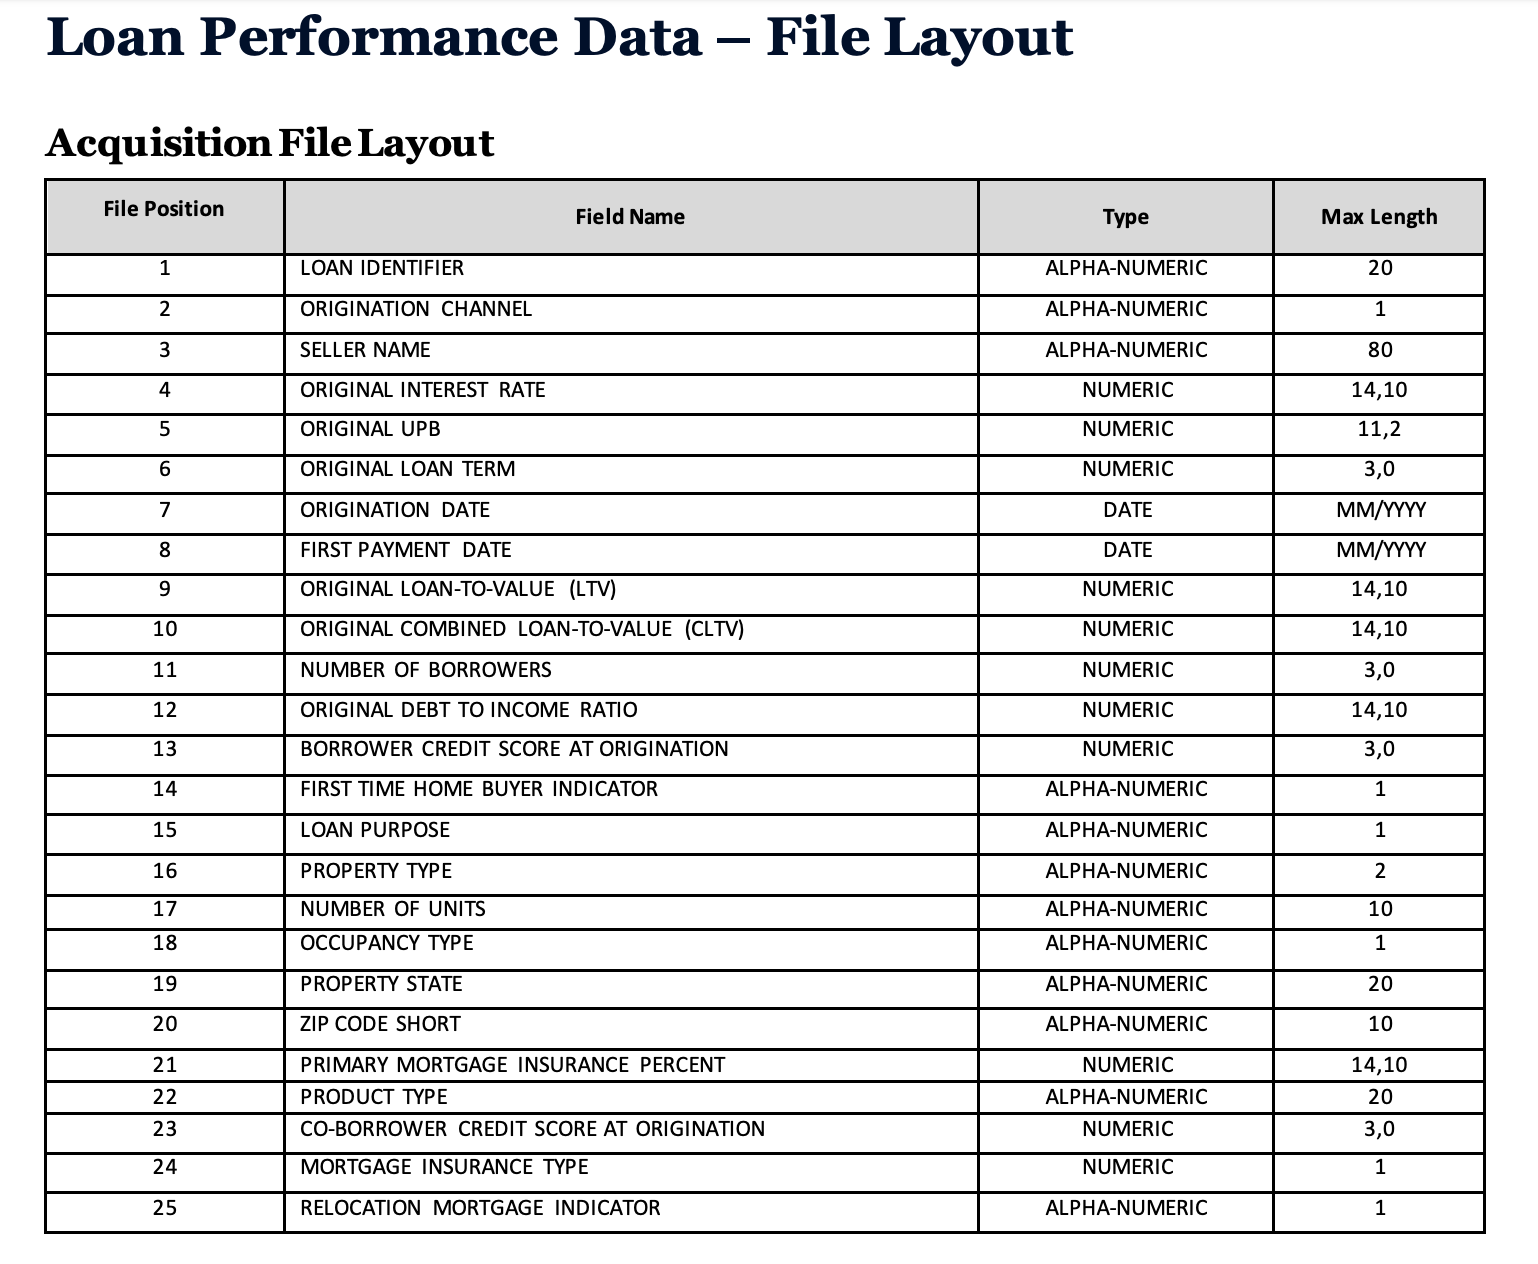

Muchos conjuntos de datos incluirán una identificación única para cada entrada. En este caso, cada entrada es un préstamo único, por lo que la primera columna en el conjunto de datos es el `IDENTIFICADOR DE PRÉSTAMO`, una identificación alfanumérica para cada préstamo. Observe lo que cada variable pretende representar y qué variables pueden tener valores faltantes. Por ejemplo, ¿sabe cuál es la diferencia entre `PRÉSTAMO A VALOR` y `PRÉSTAMO A VALOR COMBINADO`? ¿Conoce los valores que puede asumir `PROPÓSITO DEL PRÉSTAMO` y qué pretende representar?

Después de leer las descripciones de los datos, responda las siguientes preguntas.

### Ejercicio 3:
#### 3.1
Fannie Mae actualiza sus datos en función de los esfuerzos continuos de control de calidad. ``VERDADERO`` o ``FALSO``?

**Respuesta.** ``VERDADERO``, Fannie Mae actualiza sus datos, y el sitio web dice:
> Durante las actualizaciones trimestrales, Fannie Mae actualizará los datos de adquisición en el conjunto de datos principal para reflejar cualquier corrección de datos que resulte de los esfuerzos continuos de control de calidad.

#### 3.2
Si Fannie Mae actualiza sus datos, ¿cómo afectan las correcciones al conjunto de datos?

(a) Las correcciones sólo pueden resultar en adiciones de préstamos hipotecarios.

(b) Las correcciones solo pueden resultar en eliminaciones.

(c) Las correcciones pueden resultar en adiciones o eliminaciones.

(d) El sitio web no indica cómo las correcciones pueden afectar el conjunto de datos.

**Respuesta.** La respuesta es (c). El sitio web dice:
> Las correcciones podrían resultar en la adición o eliminación de préstamos hipotecarios de la población original. Además, los datos de rendimiento también reflejarán cambios si se han realizado correcciones de servicio en el trimestre anterior.

#### 3.3
¿Qué hace Fannie Mae con sus conjuntos de datos cuando faltan datos o no están disponibles?

(a) Elimina toda la entrada de datos.

(b) Deja esos valores en blanco.

(c) Reemplaza esos valores con la palabra "faltante".

(d) El sitio web no indica cómo se manejan los valores faltantes o no disponibles.

**Respuesta.** La respuesta es (b). El sitio web afirma que deja esos valores en blanco.

##Entender tus limitaciones de datos 

Ahora, consideremos los tipos de deudores incluidos en los datos. (En casos posteriores, aprenderá sobre la *población* de interés frente a la *muestra* particular disponible para usted). Una consideración importante en la **suficiencia de la información** es qué preguntas puede y no puede responder con este conjunto de datos. En general, no desea intentar responder preguntas sobre las que no tiene *ninguna* información. Por ejemplo, si alguien te pregunta cómo andar en motocicleta y no tienes idea de cómo hacerlo, probablemente dirás: "No sé". Lo que es complicado en la ciencia de datos es que a veces tenemos *alguna* pero no *toda* la información, y depende de usted determinar si tiene suficiente.

Por ahora, solo consideraremos los tipos de deudores y préstamos incluidos en este conjunto de datos. Si ciertos deudores y préstamos no están incluidos en el conjunto de datos, debemos ser más cautelosos al responder cualquier pregunta sobre ellos. Incluso para los deudores incluidos en los datos, debemos preguntarnos: *¿Cuán representativa es la población de personas que solicitan préstamos hipotecarios Fannie Mae de la población general que solicita hipotecas?*


Además, tenga en cuenta que este conjunto de datos es solo un subconjunto de las hipotecas que Fannie Mae afirma incluir:
> El... conjunto de datos [primario] es un subconjunto de las hipotecas convencionales de tasa fija unifamiliares a 30 años o menos, totalmente amortizables y con documentación completa de Fannie Mae

### Ejercicio 4:

#### 4.1
¿Qué deudores **no** están en este conjunto de datos y, por lo tanto, no están incluidos en su análisis? Seleccione todas las que correspondan.

1. Deudores que no toman prestado de Fannie Mae.
2. Deudores de viviendas unifamiliares.
3. Deudores de viviendas multifamiliares.
4. Deudores con hipotecas a tipo fijo.
5. Deudores con hipotecas de tasa ajustable.
6. Deudores con hipotecas emitidas por el gobierno.
7. Acreditados con hipotecas anteriores a 1999.

**Respuesta.** 1., 3., 5., 6. y 7. **no** están en el conjunto de datos.

#### 4.2
¿Por qué se excluyeron del conjunto de datos ciertos préstamos hipotecarios, como Alt-A u otros préstamos hipotecarios con documentación reducida o procesamiento simplificado?

(a) Fannie Mae olvidó incluirlos y es muy difícil incluirlos retroactivamente.

(b) Fannie Mae no dispone de datos sobre estos préstamos hipotecarios.

(c) Fannie Mae quería que el conjunto de datos fuera más representativo de las pautas de suscripción actuales.

(d) El sitio web no indica por qué se excluyeron estos préstamos.

**Respuesta.** La respuesta es (c). El sitio web dice:
> Ciertos tipos de préstamos hipotecarios (p. ej., préstamos hipotecarios con LTV superiores al 97 por ciento, Alt-A, otros préstamos hipotecarios con documentación reducida y/o procesamiento simplificado, y programas o variaciones que no son elegibles hoy) han sido excluidos para hacer el conjunto de datos refleja más las pautas de suscripción actuales.

#### 4.3
¿Cuál de las siguientes preguntas **no** debe responderse usando solo este conjunto de datos? Seleccione todas las que correspondan.

1. ¿Qué factores son críticos para que alguien decida en primer lugar no solicitar un préstamo hipotecario?
2. ¿Qué factores influyen más en el puntaje crediticio de un deudor?
3. ¿Qué causa que un deudor de Fannie Mae no cumpla con su hipoteca?
4. ¿Con qué frecuencia los deudores de Fannie Mae hacen pagos atrasados?

**Respuesta.** #1 **no** debe responderse utilizando este conjunto de datos, ya que no se incluyen las personas que ni siquiera han solicitado un préstamo hipotecario. #2 **no** debe responderse usando este conjunto de datos, ya que no se incluyen muchos factores que influyen en el puntaje crediticio de un deudor. Puede ser posible responder la #3 usando este conjunto de datos, pero necesitamos aprender más sobre qué datos se necesitan para responder preguntas causales (aprenderá más sobre esto en casos posteriores). Es posible que se pueda responder la pregunta #4 con este conjunto de datos, pero debemos verificar que los datos de pago que Fannie Mae proporciona estén completos.

## Data Acquisition

Ahora que entendemos nuestra pregunta de interés y hemos recopilado algunos datos prometedores, comenzaremos a explorar los factores relacionados con la adquisición de hipotecas. Practicaremos las habilidades previamente desarrolladas en la lectura de tablas de resumen, tablas y gráficos, y nos centraremos en los *datos de adquisición* proporcionados por Fannie Mae, que proporciona información a nivel de préstamo sobre las hipotecas adquiridas.

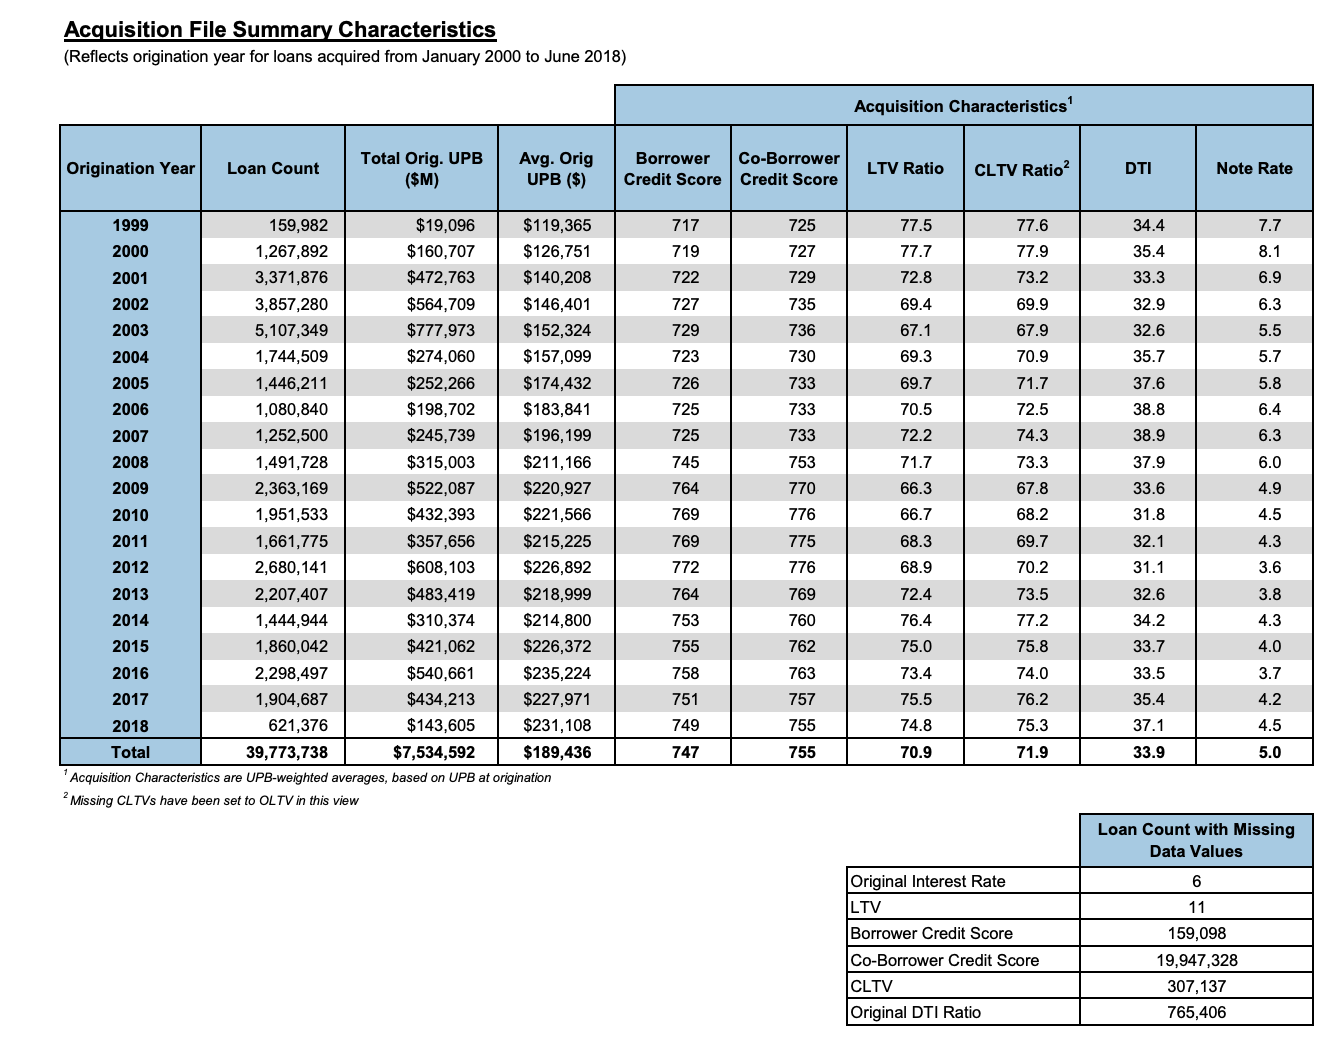



### Ejercicio 5:

#### 5.1
¿Qué tendencia, si es que hay alguna, observa en el puntaje crediticio promedio del prestatario a lo largo del tiempo?

(a) El puntaje crediticio promedio del deudor está aumentando aproximadamente;

(b) el puntaje crediticio promedio del deudor está disminuyendo aproximadamente;

(c) el puntaje crediticio promedio del deudor se mantiene aproximadamente igual;

(re. Ninguna de las anteriores.

**Respuesta.** (a), porque parece que el puntaje crediticio promedio del deudor fue de 720 en los años 1999-2007 y aumenta aproximadamente a 760 en los años 2008-2018.

---

Es probable que el puntaje crediticio promedio del deudor sea un factor que esté altamente relacionado con si un préstamo se paga a tiempo. Dado que nuestra exploración de datos hasta el momento ha demostrado que parece haber una tendencia en el puntaje crediticio promedio del deudor a lo largo del tiempo, deberíamos considerar centrarnos en un período de tiempo más reducido para identificar los factores críticos para las solicitudes de hipotecas.

---

#### 5.2
Tenga en cuenta que el puntaje crediticio promedio del codeudor tiende a ser más alto que el puntaje crediticio promedio del deudor. ¿Es esto sorprendente? ¿Por qué o por qué no?

**Respuesta.** Esto no es sorprendente, ya que una solicitud de préstamo solo se fortalece si el codeudor tiene un puntaje crediticio más alto que el deudor original. Esto también sugiere que es posible que no se requiera la inclusión de un codeudor, y solo lo utilizan los deudores con puntajes de crédito que podrían beneficiarse al incluir a un codeudor con un puntaje de crédito más alto.

---

De manera similar, el puntaje crediticio del codeudor probablemente sea un factor importante para determinar si una hipoteca se paga a tiempo. Tenga en cuenta que, si bien podemos adivinar la relación entre el puntaje crediticio de un deudor y el de un codeudor, estas estadísticas resumidas no brindan suficientes detalles para determinar cómo se relacionan entre sí.

A continuación, nos centraremos en un período de tiempo más limitado y analizaremos los préstamos individuales frente a las estadísticas resumidas. Usando el código que se le proporcionó, cargaremos un conjunto de datos sobre adquisiciones de préstamos, haremos algunas gráficas y las interpretaremos. El conjunto de datos completo incluye 39 millones de solicitudes de préstamos hipotecarios. Aquí exploraremos un subconjunto del segundo trimestre de 2018. Ejecute el código en cada celda y responda las preguntas asociadas.

In [17]:
AcqData = pd.read_table('Acquisition_2018Q2.txt', sep="|", header=None)

# Nombres de columnas que aparecen en la documentacion
acq_header_names = ["LOAN_IDENTIFIER",
                    "ORIGINATION_CHANNEL",
                    "SELLER_NAME",
                    "ORIGINAL_INTEREST_RATE",
                    "ORIGINAL_UPB",
                    "ORIGINAL_LOAN_TERM",
                    "ORIGINATION_DATE",
                    "FIRST_PAYMENT_DATE",
                    "ORIGINAL_LTV",
                    "ORIGINAL_COMB_LTV",
                    "NUMBER_OF_BORRWERS",
                    "ORIGINAL_DEBT_TO_INCOME_RATIO",
                    "BORROWER_CREDIT_SCORE_ORIG",
                    "FIRST_TIME_HOME_BUYER_IND",
                    "LOAN_PURPOSE",
                    "PROPERTY_TYPE",
                    "NUMBER_OF_UNITS",
                    "OCCUPANCY_TYPE",
                    "PROPERTY_STATE",
                    "ZIP_CODE_SHORT",
                    "PRIMARY_MORTGAGE_INSURANCE_PERCENT",
                    "PRODUCT_TYPE",
                    "COBORROWER_CREDIT_SCORE_ORIG",
                    "MORTGAGE_INSURANCE_TYPE",
                    "RELOCATION_MORTGAGE_IND"]
AcqData.columns = acq_header_names

AcqData.head()

,LOAN_IDENTIFIER,ORIGINATION_CHANNEL,SELLER_NAME,ORIGINAL_INTEREST_RATE,ORIGINAL_UPB,ORIGINAL_LOAN_TERM,ORIGINATION_DATE,FIRST_PAYMENT_DATE,ORIGINAL_LTV,ORIGINAL_COMB_LTV,...,PROPERTY_TYPE,NUMBER_OF_UNITS,OCCUPANCY_TYPE,PROPERTY_STATE,ZIP_CODE_SHORT,PRIMARY_MORTGAGE_INSURANCE_PERCENT,PRODUCT_TYPE,COBORROWER_CREDIT_SCORE_ORIG,MORTGAGE_INSURANCE_TYPE,RELOCATION_MORTGAGE_IND
0,100000274788,C,PENNYMAC CORP.,4.250,271000,360,05/2018,07/2018,75,75,...,SF,1,P,IA,500,NaN,FRM,NaN,NaN,N
1,100001584442,C,"FLAGSTAR BANK, FSB",4.625,342000,360,03/2018,05/2018,53,91,...,PU,1,P,AZ,852,NaN,FRM,NaN,NaN,N
2,100002839546,C,OTHER,4.750,335000,360,03/2018,05/2018,77,77,...,PU,1,P,TX,750,NaN,FRM,NaN,NaN,N
3,100007968800,R,OTHER,4.500,279000,360,05/2018,07/2018,95,95,...,SF,1,P,AR,727,30.0,FRM,NaN,1.0,N
4,100014865042,R,FREEDOM MORTGAGE CORP.,4.125,344000,180,03/2018,05/2018,80,80,...,SF,1,P,NH,31,NaN,FRM,746.0,NaN,N


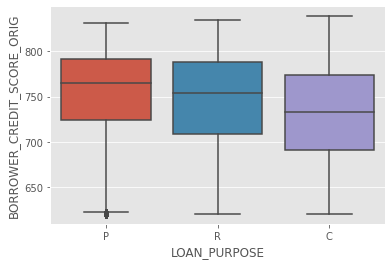

In [18]:
sns.boxplot(x = 'LOAN_PURPOSE', y = 'BORROWER_CREDIT_SCORE_ORIG', data = AcqData)

Los codigos anteriores indican:

```
C = construction (build a new house)
P = purchase (buy an existing house)
R = refinance (switch to a different loan)
```

#### 5.3
Con base en el diagrama anterior, ¿cómo describiría la distribución de los puntajes crediticios de los deudores para las solicitudes de préstamo con fines de **construcción**?

(a) La distribución parece aproximadamente simétrica;

(b) La distribución parece aproximadamente sesgada hacia la derecha;

(c) La distribución parece aproximadamente sesgada a la izquierda;

(d) No se puede decir de la trama proporcionada.

**Respuesta.** (a)

#### 5.4
Con base en el diagrama anterior, ¿cómo describiría la distribución de los puntajes crediticios del deudor para las solicitudes de préstamo con el propósito de construcción versus compra? Seleccione todas las que correspondan.

(a) Las distribuciones se ven iguales;

(b) Los puntajes crediticios del deudor parecen significativamente más altos para las viviendas para comprar;

(c) Los puntajes crediticios del deudor parecen significativamente más bajos para las viviendas para comprar;

(d) No se puede decir de la trama proporcionada.

**Respuesta.** (a)

Recuerde anteriormente que la tabla de resúmenes de datos indicaba que el puntaje crediticio promedio del codeudor era más alto que el puntaje crediticio promedio del deudor. Profundizaremos en esta información a nivel de préstamo en lugar de estadísticas resumidas para ver si los puntajes crediticios de los codeudor son un factor importante a considerar para el pago de la hipoteca.

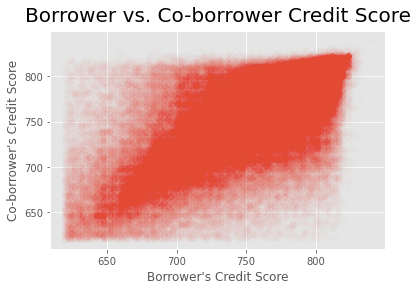

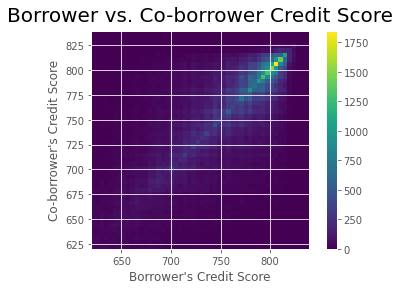

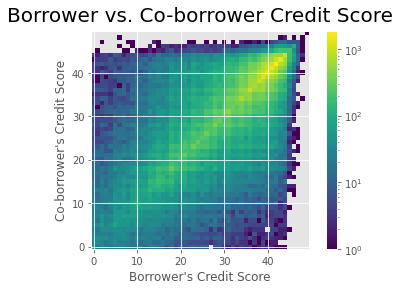

In [19]:
from matplotlib.colors import LogNorm

x = AcqData['BORROWER_CREDIT_SCORE_ORIG']
y = AcqData['COBORROWER_CREDIT_SCORE_ORIG']

x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

y = y[~np.isnan(x)]
x = x[~np.isnan(x)]

plt.scatter(x,y,alpha=0.01)
plt.title("Borrower vs. Co-borrower Credit Score", fontsize=20, verticalalignment='bottom')
plt.xlabel("Borrower's Credit Score")
plt.ylabel("Co-borrower's Credit Score")
plt.show()

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.colorbar()
plt.title("Borrower vs. Co-borrower Credit Score", fontsize=20, verticalalignment='bottom')
plt.xlabel("Borrower's Credit Score")
plt.ylabel("Co-borrower's Credit Score")
plt.show()

plt.clf()
plt.imshow(heatmap.T, norm=LogNorm(), origin='lower')
plt.colorbar()
plt.title("Borrower vs. Co-borrower Credit Score", fontsize=20, verticalalignment='bottom')
plt.xlabel("Borrower's Credit Score")
plt.ylabel("Co-borrower's Credit Score")
plt.show()

Observe que estos tres gráficos muestran exactamente los mismos datos de diferentes maneras. Dado que hay tantos puntos de datos, ajustar la opacidad de los puntos o aplicar degradados puede facilitar su visualización. A partir de estos gráficos, parece que el puntaje crediticio del deudor y el puntaje crediticio del codeudor generalmente están muy relacionados: cuando el puntaje crediticio del deudor es alto, el puntaje crediticio del codeudor es alto; cuando el puntaje crediticio del deudor es bajo, el del codeudor es bajo.

*¿Qué hemos aprendido hasta ahora sobre los factores importantes para la adquisición de hipotecas?* Sabemos por el conocimiento del dominio que los puntajes crediticios son probablemente factores importantes para determinar el pago de la hipoteca. Por lo tanto, podemos pensar en el puntaje crediticio de un deudor como un indicador de la probabilidad de pago de la hipoteca. Con base en lo que hemos visto de los datos de adquisición, incluso antes de observar el desempeño de la hipoteca, sabemos que los puntajes crediticios parecen no diferir sustancialmente según el propósito del préstamo, por lo que tal vez este no sea un factor importante. Además, cuando examinamos datos más granulares, vimos que los puntajes crediticios de los codeudores no siempre son más altos que los puntajes crediticios de los deudores, como sospechábamos inicialmente. Esto sugiere que la calificación crediticia del codeudor puede ser un factor importante a considerar en el pago de la hipoteca, independientemente de la calificación crediticia del deudor.

## Sacar conclusiones de los datos de rendimiento

Ahora, usemos algunos de los factores que exploramos para la adquisición de hipotecas para analizar el rendimiento de la hipoteca. Seguiremos practicando la lectura de gráficos, pero ahora nos centraremos en los *datos de rendimiento* proporcionados por Fannie Mae, que brindan información a nivel de préstamo sobre el pago de la hipoteca. Valoraremos la suficiencia de la información para proponer a nuestro jefe factores iniciales de interés relacionados con la amortización de una hipoteca a tiempo.

Usando el código que se le proporcionó, cargaremos un conjunto de datos sobre el rendimiento del préstamo, haremos algunos gráficos y los interpretaremos. Aquí continuaremos explorando un subconjunto del segundo trimestre de 2018. Ejecute el código en cada celda y responda las preguntas asociadas.

In [20]:
PerfData = pd.read_table('Performance_2018Q2.txt', sep="|", header=None)

#Nombres de las columnas en la descripción
perf_header_names = ["LOAN_IDENTIFIER",
                     "MONTHLY_REPORTING",
                     "SERVICER_NAME",
                     "CURRENT_INTEREST_RATE",
                     "CURRENT_ACTUAL_UPB",
                     "LOAN_AGE",
                     "REMAINING_MONTHS_TO_LEGAL_MATURITY",
                     "ADJUSTED_MONTHS_TO_MATURITY",
                     "MATURITY_DATE",
                     "METROPOLITAN_STATISTICAL_AREA",
                     "CURRENT_LOAN_DELINQUENCY_STATUS",
                     "MODIFICATION_FLAG",
                     "ZERO BALANCE_CODE",
                     "ZERO BALANCE_EFFECTIVE",
                     "LAST_PAID_INSTALLMENT",
                     "FORECLOSURE_DATE",
                     "DISPOSITION_DATE",
                     "FORECLOSURE_COSTS",
                     "PROPERTY PRESERVATION_AND_REPAIR_COSTS",
                     "ASSET_RECOVERY_COSTS",
                     "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
                     "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY",
                     "NET_SALE_PROCEEDS",
                     "CREDIT_ENHANCEMENT_PROCEEDS",
                     "REPURCHASE_MAKE_WHOLE_PROCEEDS",
                     "OTHER_FORECLOSURE_PROCEEDS",
                     "NON_INTEREST_BEARING_UPB",
                     "PRINCIPAL_FORGIVENESS_AMOUNT",
                     "REPURCHASE_MAKE_WHOLE_PROCEEDS_FLAG",
                     "FORECLOSURE_PRINCIPAL_WRITE-OFF_AMOUNT",
                     "SERVICING_ACTIVITY_INDICATOR"]
  
PerfData.columns = perf_header_names

PerfData.head()

,LOAN_IDENTIFIER,MONTHLY_REPORTING,SERVICER_NAME,CURRENT_INTEREST_RATE,CURRENT_ACTUAL_UPB,LOAN_AGE,REMAINING_MONTHS_TO_LEGAL_MATURITY,ADJUSTED_MONTHS_TO_MATURITY,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,...,ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY,NET_SALE_PROCEEDS,CREDIT_ENHANCEMENT_PROCEEDS,REPURCHASE_MAKE_WHOLE_PROCEEDS,OTHER_FORECLOSURE_PROCEEDS,NON_INTEREST_BEARING_UPB,PRINCIPAL_FORGIVENESS_AMOUNT,REPURCHASE_MAKE_WHOLE_PROCEEDS_FLAG,FORECLOSURE_PRINCIPAL_WRITE-OFF_AMOUNT,SERVICING_ACTIVITY_INDICATOR
0,100000274788,06/01/2018,PENNYMAC CORP.,4.25,NaN,0,360,360.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,100000274788,07/01/2018,NaN,4.25,NaN,1,359,359.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
2,100000274788,08/01/2018,NaN,4.25,NaN,2,358,357.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,100000274788,09/01/2018,NaN,4.25,NaN,3,357,356.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,100000274788,10/01/2018,NaN,4.25,NaN,4,356,354.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [21]:
print(sum(PerfData['ADJUSTED_MONTHS_TO_MATURITY'] == 0))

18173


La línea anterior nos muestra que hay más de 18000 préstamos en este conjunto de datos del segundo trimestre de 2018, donde los meses ajustados hasta el vencimiento son cero. A los efectos de este caso, consideraremos que estos préstamos son aquellos en los que el pago no se entregó a tiempo. En otras palabras, trataremos esto como el resultado de los intereses ("Verdadero" significa que el préstamo se pagó a tiempo, "Falso" significa que el préstamo no se pagó a tiempo).

In [22]:
PerfData['LOAN_REPAID_ON_TIME'] = PerfData['ADJUSTED_MONTHS_TO_MATURITY'] != 0

In [23]:
PerfData

,LOAN_IDENTIFIER,MONTHLY_REPORTING,SERVICER_NAME,CURRENT_INTEREST_RATE,CURRENT_ACTUAL_UPB,LOAN_AGE,REMAINING_MONTHS_TO_LEGAL_MATURITY,ADJUSTED_MONTHS_TO_MATURITY,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,...,NET_SALE_PROCEEDS,CREDIT_ENHANCEMENT_PROCEEDS,REPURCHASE_MAKE_WHOLE_PROCEEDS,OTHER_FORECLOSURE_PROCEEDS,NON_INTEREST_BEARING_UPB,PRINCIPAL_FORGIVENESS_AMOUNT,REPURCHASE_MAKE_WHOLE_PROCEEDS_FLAG,FORECLOSURE_PRINCIPAL_WRITE-OFF_AMOUNT,SERVICING_ACTIVITY_INDICATOR,LOAN_REPAID_ON_TIME
0,100000274788,06/01/2018,PENNYMAC CORP.,4.250,NaN,0,360,360.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,True
1,100000274788,07/01/2018,NaN,4.250,NaN,1,359,359.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,True
2,100000274788,08/01/2018,NaN,4.250,NaN,2,358,357.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,True
3,100000274788,09/01/2018,NaN,4.250,NaN,3,357,356.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,True
4,100000274788,10/01/2018,NaN,4.250,NaN,4,356,354.0,06/2048,19780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101009,999998485324,11/01/2018,NaN,4.875,68732.29,7,293,292.0,04/2043,37460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,True
4101010,999998485324,12/01/2018,NaN,4.875,68609.11,8,292,291.0,04/2043,37460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,True
4101011,999998485324,01/01/2019,NaN,4.875,68485.43,9,291,290.0,04/2043,37460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,True
4101012,999998485324,02/01/2019,NaN,4.875,68361.25,10,290,289.0,04/2043,37460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,True


### Ejercicio 6:
Recuerde que estos son los factores que creemos que están relacionados con el pago de la hipoteca según el conjunto de datos de adquisición y el conocimiento del dominio:
1. puntaje de crédito del deudor
2. puntaje crediticio del codeudor (*a veces muy relacionado con el puntaje crediticio del deudor, a veces no*)
3. propósito del préstamo (*tal vez; aunque no está claramente relacionado con el puntaje crediticio, aún puede ser importante*)

En las próximas tres preguntas, evaluará cómo la tasa de interés actual, el UPB real actual (saldo de capital no pagado) y la antigüedad del préstamo están relacionados con si el préstamo se paga o no a tiempo.

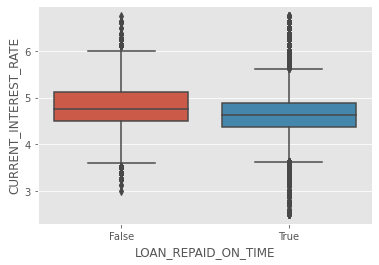

In [24]:
sns.boxplot(x = 'LOAN_REPAID_ON_TIME', y = 'CURRENT_INTEREST_RATE', data = PerfData)
plt.show()

#### 6.1
Con base en el gráfico anterior, ¿cómo describiría la diferencia entre la distribución de las tasas de interés actuales para las hipotecas pagadas a tiempo frente a las hipotecas no pagadas a tiempo?

(a) Las hipotecas pagadas a tiempo tienden a tener tasas de interés significativamente más bajas;

(b) Las hipotecas pagadas a tiempo tienden a tener tasas de interés ligeramente más bajas;

(c) Las hipotecas pagadas a tiempo tienden a tener las mismas tasas de interés, con algunos valores atípicos significativamente más bajos;

(d) No se puede decir de la trama proporcionada.

**Respuesta.** (c)

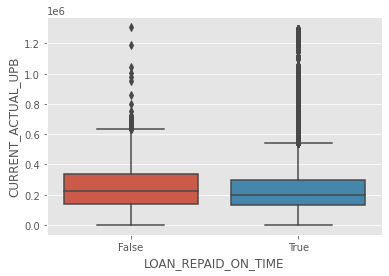

In [25]:
sns.boxplot(x = 'LOAN_REPAID_ON_TIME', y = 'CURRENT_ACTUAL_UPB', data = PerfData)
plt.show()

#### 6.2
Con base en el diagrama anterior, ¿cómo describiría la diferencia entre la distribución de la UPB real actual para las hipotecas pagadas a tiempo frente a la de las hipotecas no pagadas a tiempo?

(a) Las hipotecas pagadas a tiempo tienden a tener UBP significativamente más altas;

(b) Las hipotecas pagadas a tiempo tienden a tener UBP ligeramente más altas;

(c) Las hipotecas pagadas a tiempo tienden a tener las mismas UBP;

(d) No se puede decir de la trama proporcionada.

**Respuesta.** (c)

*Nota: algo inusual en este diagrama que requiere una mayor investigación de los datos es que parece que hay algunos préstamos identificados como no pagados a tiempo, pero el saldo de capital impago es cero.*

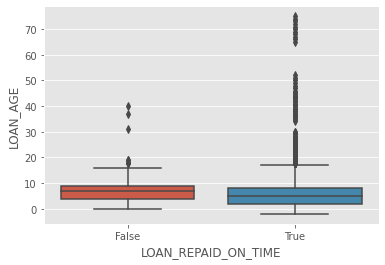

In [26]:
sns.boxplot(x = 'LOAN_REPAID_ON_TIME', y = 'LOAN_AGE', data = PerfData)
plt.show()

#### 6.3
Con base en el gráfico anterior, ¿cómo describiría la diferencia entre las distribuciones de la antigüedad de los préstamos para la hipoteca pagada a tiempo y no pagada?

(a) Las hipotecas pagadas a tiempo son significativamente más antiguas;

(b) Las hipotecas pagadas a tiempo son un poco más antiguas;

(c) Las hipotecas pagadas a tiempo tienden a tener la misma antigüedad, con algunos valores atípicos significativamente más antiguos;

(d) No se puede decir de la trama proporcionada.

**Respuesta.** (c)

## Conclusiones

Trabajamos con los datos de rendimiento de préstamos unifamiliares de Fannie Mae para comenzar a explorar qué factores de las solicitudes de hipotecas unifamiliares en los EE. UU. están más relacionados con los préstamos que se pagan a tiempo. Con base en el conocimiento del dominio y la información en los conjuntos de datos de adquisición y rendimiento proporcionados por Fannie Mae, le informaremos a nuestro jefe que los factores relacionados con el rendimiento de la hipoteca parecen ser complicados. En nuestra exploración univariante, no pudimos identificar diferencias obvias entre la tasa de interés actual, el UPB real actual (saldo de capital pendiente de pago) y la antigüedad del préstamo para hipotecas pagadas a tiempo vs. tarde. En nuestra exploración de la relación entre los puntajes crediticios del deudor y del codeudor, vimos una fuerte tendencia positiva pero también una gran variabilidad.

Además, vimos que los datos proporcionados por Fannie Mae no son suficientes para responder la pregunta de interés, ya que faltan muchos valores y solo se recopilaron ~ 30 factores que podrían analizarse por su relación con el rendimiento del préstamo.

## Para llevar

En este caso, desarrolló sus habilidades para recopilar información y evaluar la suficiencia de la información. Crucialmente, aprendimos que antes de hacer CUALQUIER análisis de los datos, debemos:

1. Comprender y aclarar la pregunta de interés. En entornos comerciales prácticos, las preguntas a menudo se plantean de manera vaga y deben hacerse más específicas para que incluso sean útiles.
2. Saber cómo debería ser nuestro conjunto de datos ideal antes de gastar tiempo y esfuerzo valiosos en buscar nuevos conjuntos de datos o analizar un conjunto de datos existente.
3. Identificar las capacidades y limitaciones de nuestros conjuntos de datos, para que sepamos lo que podemos y no podemos concluir y actuar en un entorno comercial una vez que terminemos nuestro análisis.

También aprendimos que hay pasos adicionales en el proceso de ciencia de datos que exploraremos en casos futuros, como la limpieza de datos, la generación de gráficos y cálculos formales para evaluar la suficiencia del tamaño de la muestra, probar hipótesis y predecir resultados de interés.